In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams.update({'font.family':'Arial','font.size':12})

df = pd.read_csv("selected_imputed_genes_tfs.txt",sep="\t",index_col=0)
df = df.T

In [3]:
df

,AU565_AAACCAGTTTGG,AU565_AAACGTGCAGCG,AU565_AAAGCCACATGC,AU565_AAAGTCGGCTGG,AU565_AAAGTGCCTAAA,AU565_AAATCATCTTAT,AU565_AAATCATTGTCT,AU565_AAATTACTTCAT,AU565_AAATTATTAGAT,AU565_AAATTGATTTGT,...,MDAMB453_TTTCAGCAACCC,MDAMB453_TTTCATCCAGAT,MDAMB453_TTTCCACTCGAT,MDAMB453_TTTGAGCCCGCT,MDAMB453_TTTGATTGTCTG,MDAMB453_TTTGGAGATGGT,MDAMB453_TTTGTCTTACTT,MDAMB453_TTTTAGACGCCA,MDAMB453_TTTTGGAGGCAA,MDAMB453_TTTTTACCCTCC
ENSG00000010278,1.7189,1.8434,1.7764,1.7722,1.6693,1.5177,1.6831,1.8281,1.6775,2.1518,...,2.4155,2.2865,2.3463,2.3693,2.4883,2.4579,2.3693,2.3671,2.5229,2.5053
ENSG00000105963,0.0167,0.0102,0.0469,0.0053,0.0091,0.0164,0.0092,0.0213,0.0070,0.0999,...,0.0006,0.0003,0.0000,0.0003,0.0000,0.0002,0.0071,0.0000,0.0005,0.0000
ENSG00000143153,1.5199,1.5407,1.5021,1.4516,1.7869,1.6634,1.6706,1.5088,1.6043,1.8583,...,0.9390,1.0696,0.8957,0.7990,1.1191,0.7560,0.9116,0.9178,0.9226,1.0675
ENSG00000162105,0.0379,0.0354,0.0479,0.0371,0.0998,0.0190,0.1039,0.0457,0.0652,0.0057,...,0.1424,0.2302,0.1036,0.0963,0.2976,0.0201,0.1831,0.1580,0.1120,0.3874
ENSG00000008283,0.6602,0.6605,0.6425,0.6955,0.7639,0.7412,0.6557,0.6743,0.6153,0.5538,...,1.0682,0.7560,0.6479,0.5408,0.9256,0.7060,0.7995,0.5469,0.7878,1.0163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000197360,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ENSG00000197921,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ENSG00000223614,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ENSG00000229544,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [2]:
df_meta = pd.read_csv("metadata.txt",sep="\t",index_col=0).to_dict('index')

In [5]:
df_meta

{'AU565': {'subtype': 'H'},
 'BT20': {'subtype': 'TNA'},
 'BT474': {'subtype': 'LB'},
 'BT483': {'subtype': 'LA'},
 'BT549': {'subtype': 'TNB'},
 'CAL51': {'subtype': 'TNB'},
 'CAL851': {'subtype': 'TNB'},
 'CAMA1': {'subtype': 'LA'},
 'DU4475': {'subtype': 'TNA'},
 'EFM19': {'subtype': 'LA'},
 'EVSAT': {'subtype': 'H'},
 'HCC1143': {'subtype': 'TNA'},
 'HCC1187': {'subtype': 'TNA'},
 'HCC1500': {'subtype': 'LA'},
 'HCC1937': {'subtype': 'TNA'},
 'HCC1954': {'subtype': 'H'},
 'HCC38': {'subtype': 'TNB'},
 'HCC70': {'subtype': 'TNA'},
 'HDQP1': {'subtype': 'TNB'},
 'HS578T': {'subtype': 'TNB'},
 'JIMT1': {'subtype': 'H'},
 'KPL1': {'subtype': 'LA'},
 'MCF12A': {'subtype': 'Basal-like'},
 'MCF7': {'subtype': 'LA'},
 'MDAMB361': {'subtype': 'LB'},
 'MDAMB415': {'subtype': 'LA'},
 'MDAMB436': {'subtype': 'TNA'},
 'MDAMB453': {'subtype': 'H'},
 'MDAMB468': {'subtype': 'TNA'},
 'MX1': {'subtype': 'TNB'},
 'T47D': {'subtype': 'LA'},
 'ZR751': {'subtype': 'LA'}}

In [3]:
tfs_annot = pd.read_csv("tf_annotation.txt",sep="\t",index_col=0).to_dict('index')

In [4]:
for i in df_meta:
    df_meta[i] = df_meta[i]["subtype"]

In [8]:
df_meta

{'AU565': 'H',
 'BT20': 'TNA',
 'BT474': 'LB',
 'BT483': 'LA',
 'BT549': 'TNB',
 'CAL51': 'TNB',
 'CAL851': 'TNB',
 'CAMA1': 'LA',
 'DU4475': 'TNA',
 'EFM19': 'LA',
 'EVSAT': 'H',
 'HCC1143': 'TNA',
 'HCC1187': 'TNA',
 'HCC1500': 'LA',
 'HCC1937': 'TNA',
 'HCC1954': 'H',
 'HCC38': 'TNB',
 'HCC70': 'TNA',
 'HDQP1': 'TNB',
 'HS578T': 'TNB',
 'JIMT1': 'H',
 'KPL1': 'LA',
 'MCF12A': 'Basal-like',
 'MCF7': 'LA',
 'MDAMB361': 'LB',
 'MDAMB415': 'LA',
 'MDAMB436': 'TNA',
 'MDAMB453': 'H',
 'MDAMB468': 'TNA',
 'MX1': 'TNB',
 'T47D': 'LA',
 'ZR751': 'LA'}

In [5]:
cells = [i.split("_")[0] for i in list(df.T.index)]

In [6]:
df = df.T

In [7]:
df["cellline"] = cells

In [12]:
df

,ENSG00000010278,ENSG00000105963,ENSG00000143153,ENSG00000162105,ENSG00000008283,ENSG00000099219,ENSG00000139832,ENSG00000105357,ENSG00000014216,ENSG00000132746,...,ENSG00000187772,ENSG00000188779,ENSG00000196460,ENSG00000197213,ENSG00000197360,ENSG00000197921,ENSG00000223614,ENSG00000229544,ENSG00000258873,cellline
AU565_AAACCAGTTTGG,1.7189,0.0167,1.5199,0.0379,0.6602,0.1163,0.3532,0.0240,0.5038,0.2516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AU565
AU565_AAACGTGCAGCG,1.8434,0.0102,1.5407,0.0354,0.6605,0.1093,0.3918,0.0451,0.5664,0.2139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AU565
AU565_AAAGCCACATGC,1.7764,0.0469,1.5021,0.0479,0.6425,0.0754,0.4187,0.0373,0.4892,0.2799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AU565
AU565_AAAGTCGGCTGG,1.7722,0.0053,1.4516,0.0371,0.6955,0.1173,0.4067,0.0407,0.4801,0.2302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AU565
AU565_AAAGTGCCTAAA,1.6693,0.0091,1.7869,0.0998,0.7639,0.1566,0.4147,0.0385,0.5282,0.2460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AU565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MDAMB453_TTTGGAGATGGT,2.4579,0.0002,0.7560,0.0201,0.7060,0.0562,0.1914,0.0525,0.1332,0.4062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MDAMB453
MDAMB453_TTTGTCTTACTT,2.3693,0.0071,0.9116,0.1831,0.7995,0.0698,0.1786,0.0493,0.2061,0.3746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MDAMB453
MDAMB453_TTTTAGACGCCA,2.3671,0.0000,0.9178,0.1580,0.5469,0.0486,0.1209,0.0983,0.1395,0.2733,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MDAMB453
MDAMB453_TTTTGGAGGCAA,2.5229,0.0005,0.9226,0.1120,0.7878,0.0707,0.1569,0.0692,0.1460,0.4873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MDAMB453


In [8]:
with open("signatures_geneids.txt") as f:
    for line in f:
        a = line[:-1].split("\t")
        print(a[0])
        df_temp = df[a[2:]]
        df_temp = df_temp.apply(zscore)
        df[a[0]] = df_temp.mean(axis=1)

Epithelial_cell_line_signature
Mesenchymal_cell_line_signature
Epithelial_tumour_signature
Mesenchymal_tumour_signature
basal_breast_cancer
luminal_breast_cancer
pEMT
HALLMARK_OXIDATIVE_PHOSPHORYLATION
HALLMARK_GLYCOLYSIS
FAO
tfs


c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

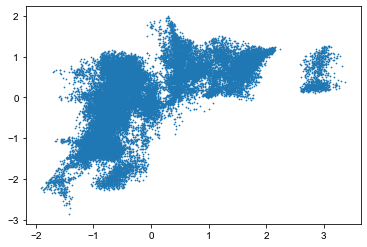

In [9]:
sns.scatterplot(df['Mesenchymal_cell_line_signature'] - df['Epithelial_cell_line_signature'], df["basal_breast_cancer"]-df["luminal_breast_cancer"], linewidth = 0, s=3)

In [15]:
emt = list(df['Mesenchymal_tumour_signature'] - df['Epithelial_tumour_signature'])
baslum = list(df['basal_breast_cancer'] - df['luminal_breast_cancer'])
with open("z_scored_scores.txt","w") as f:
    for i in range(len(emt)):
        f.write(str(emt[i])+"\t"+str(baslum[i])+"\n")

In [14]:
df['VIM-CDH1'] = df['ENSG00000026025'] - df['ENSG00000039068']
df['Mes-Epi'] = df['Mesenchymal_tumour_signature'] - df['Epithelial_tumour_signature']

In [15]:
order_variable = 'basal_breast_cancer'
orderby = df.groupby(df.cellline)[[order_variable]].median().sort_values(by=order_variable, ascending=False).index

In [16]:
df

,ENSG00000010278,ENSG00000105963,ENSG00000143153,ENSG00000162105,ENSG00000008283,ENSG00000099219,ENSG00000139832,ENSG00000105357,ENSG00000014216,ENSG00000132746,...,Mesenchymal_tumour_signature,basal_breast_cancer,luminal_breast_cancer,pEMT,HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_GLYCOLYSIS,FAO,tfs,VIM-CDH1,Mes-Epi
AU565_AAACCAGTTTGG,1.7189,0.0167,1.5199,0.0379,0.6602,0.1163,0.3532,0.0240,0.5038,0.2516,...,-0.360351,-0.482948,-0.046894,-0.537519,0.368108,-0.150585,0.362936,-0.486094,-0.0024,-0.443994
AU565_AAACGTGCAGCG,1.8434,0.0102,1.5407,0.0354,0.6605,0.1093,0.3918,0.0451,0.5664,0.2139,...,-0.358819,-0.391290,-0.095306,-0.527298,0.463100,-0.069906,0.388509,-0.475812,-0.0002,-0.432407
AU565_AAAGCCACATGC,1.7764,0.0469,1.5021,0.0479,0.6425,0.0754,0.4187,0.0373,0.4892,0.2799,...,-0.383729,-0.592754,-0.045133,-0.584420,0.471406,-0.173256,0.513564,-0.489760,-0.0003,-0.490203
AU565_AAAGTCGGCTGG,1.7722,0.0053,1.4516,0.0371,0.6955,0.1173,0.4067,0.0407,0.4801,0.2302,...,-0.397441,-0.453465,-0.093176,-0.534925,0.411719,-0.132263,0.322774,-0.506548,-0.0002,-0.445075
AU565_AAAGTGCCTAAA,1.6693,0.0091,1.7869,0.0998,0.7639,0.1566,0.4147,0.0385,0.5282,0.2460,...,-0.353921,-0.725202,0.037174,-0.503586,0.521037,-0.063638,0.612809,-0.434696,0.0000,-0.676577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MDAMB453_TTTGGAGATGGT,2.4579,0.0002,0.7560,0.0201,0.7060,0.0562,0.1914,0.0525,0.1332,0.4062,...,-0.309736,-0.463900,0.430428,-0.307347,-0.153715,-0.202498,-0.402230,-0.034745,0.3536,-0.414938
MDAMB453_TTTGTCTTACTT,2.3693,0.0071,0.9116,0.1831,0.7995,0.0698,0.1786,0.0493,0.2061,0.3746,...,-0.273670,0.532800,0.421770,-0.189470,0.352643,0.132496,0.357993,0.208543,0.2824,-0.716553
MDAMB453_TTTTAGACGCCA,2.3671,0.0000,0.9178,0.1580,0.5469,0.0486,0.1209,0.0983,0.1395,0.2733,...,-0.313655,-0.029206,0.300791,-0.329759,-0.037767,0.006848,0.027214,-0.104506,0.2419,-0.408747
MDAMB453_TTTTGGAGGCAA,2.5229,0.0005,0.9226,0.1120,0.7878,0.0707,0.1569,0.0692,0.1460,0.4873,...,-0.300141,0.098788,0.423664,-0.251034,0.187438,0.021871,0.220628,0.064165,0.2790,-0.736286


c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'MX1'),
  Text(1, 0, 'MCF12A'),
  Text(2, 0, 'HCC1143'),
  Text(3, 0, 'BT549'),
  Text(4, 0, 'CAL51'),
  Text(5, 0, 'HCC70'),
  Text(6, 0, 'MDAMB468'),
  Text(7, 0, 'HCC1954'),
  Text(8, 0, 'BT20'),
  Text(9, 0, 'HCC38'),
  Text(10, 0, 'HCC1937'),
  Text(11, 0, 'MDAMB436'),
  Text(12, 0, 'HDQP1'),
  Text(13, 0, 'CAL851'),
  Text(14, 0, 'DU4475'),
  Text(15, 0, 'MDAMB453'),
  Text(16, 0, 'JIMT1'),
  Text(17, 0, 'CAMA1'),
  Text(18, 0, 'HS578T'),
  Text(19, 0, 'HCC1187'),
  Text(20, 0, 'EFM19'),
  Text(21, 0, 'MDAMB361'),
  Text(22, 0, 'EVSAT'),
  Text(23, 0, 'MDAMB415'),
  Text(24, 0, 'HCC1500'),
  Text(25, 0, 'AU565'),
  Text(26, 0, 'ZR751'),
  Text(27, 0, 'KPL1'),
  Text(28, 0, 'T47D'),
  Text(29, 0, 'MCF7'),
  Text(30, 0, 'BT474'),
  Text(31, 0, 'BT483')])

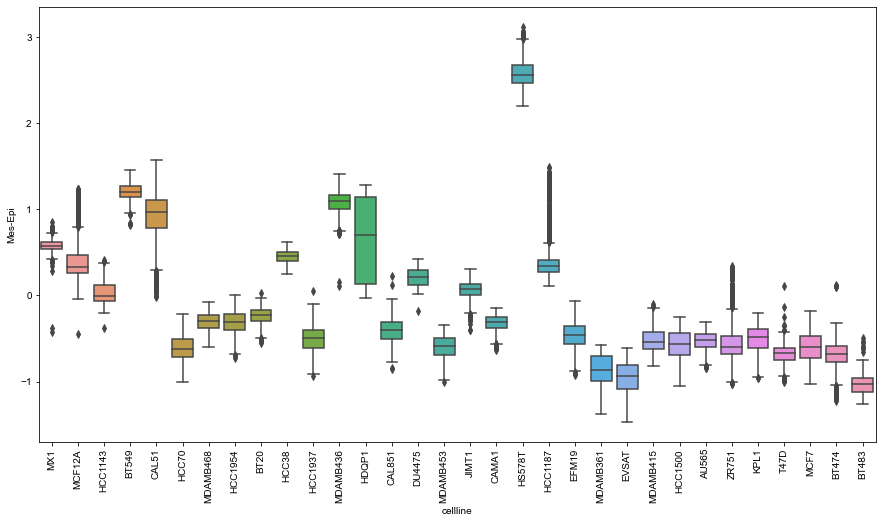

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(df["cellline"],df["Mes-Epi"],order=orderby)
plt.xticks(rotation=90)

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

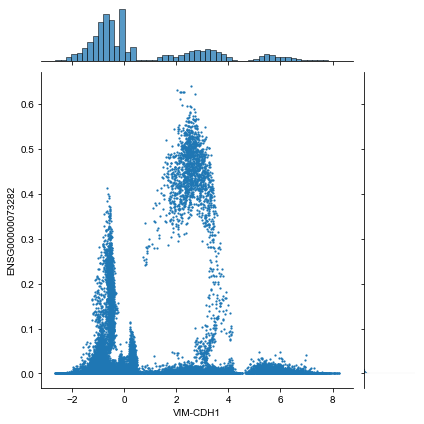

In [18]:
plt.figure(figsize=(15,15))
sns.jointplot(df["VIM-CDH1"],df["ENSG00000073282"],linewidth=0,s=5,legend=False)
plt.legend('',frameon=False)
#plt.xticks(rotation=90)

In [19]:
# identification of top epi, mes, luminal and basal tfs

df_tfs = pd.DataFrame()
with open("signatures_geneids.txt") as f:
    for line in f:
        a = line[:-1].split("\t")
        if a[0] == "tfs":
            df_tfs = df[a[2:]]

for path in ["pEMT"]:
    print(path)
    for i in df_tfs:
        corr,pval = ss.spearmanr(df[path],df_tfs[i])
        if corr > 0.5:
            print(tfs_annot[i]['tfs'],corr)

pEMT
YBX1 0.5418732190477099
MSANTD3 0.6435521071925322
SP100 0.5268129042602586
KLF6 0.5071215934924159
TCF7 0.5009370570831847
HIF1A 0.5562022258535926
ELK3 0.7996550432065875
EPAS1 0.5611511951653195
RUNX2 0.5468629738624199
HMGA1 0.5193663817458406
KLF10 0.5049249639226953
SKI 0.5085582884427258
SMAD3 0.6138047652759925
NPAS2 0.5018378960932434
FOXN2 0.5228259859117927
FOSL1 0.6170695392317741
ZBTB38 0.5107941674845788
MAFF 0.5007872468661261
ARNTL2 0.6023282953145693
FOXC1 0.5296545496551868
KLF12 0.538166320696609
ZNF462 0.5220477278361919
ETS2 0.5841597204636764
CEBPD 0.5388267188700769
SNAI2 0.7910747380751056
ZNF532 0.6468054059955011
HOXA2 0.5852421885686517
HOXA3 0.5981204905191725
GLIS3 0.7448747286206961
ETS1 0.719642406522101
ZNF365 0.5721493560353098
ZEB1 0.6258218401794556
HMGA2 0.6297155019008651
SOX7 0.5296290787211996
BNC2 0.6533685955825986
ETV4 0.5448393758154508
PLAG1 0.5248011078827882
ETV5 0.5916663005880541
PRDM1 0.5783405407670404
FOXF2 0.5026392110188718
FLI1

In [20]:
df_tfs

,ENSG00000001167,ENSG00000005801,ENSG00000005889,ENSG00000006194,ENSG00000006704,ENSG00000007866,ENSG00000007968,ENSG00000008441,ENSG00000010244,ENSG00000010539,...,ENSG00000186790,ENSG00000187772,ENSG00000188779,ENSG00000196460,ENSG00000197213,ENSG00000197360,ENSG00000197921,ENSG00000223614,ENSG00000229544,ENSG00000258873
AU565_AAACCAGTTTGG,0.0179,0.2214,0.1142,0.0391,0.1585,0.0301,0.0148,0.0007,0.5552,0.1262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AU565_AAACGTGCAGCG,0.0451,0.1837,0.1065,0.0434,0.1172,0.0201,0.0124,0.0000,0.5312,0.0913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AU565_AAAGCCACATGC,0.0429,0.2512,0.1317,0.0139,0.1498,0.0368,0.0044,0.0001,0.7001,0.1053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AU565_AAAGTCGGCTGG,0.0269,0.1639,0.1037,0.0265,0.1261,0.0289,0.0289,0.0000,0.5627,0.1301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AU565_AAAGTGCCTAAA,0.0161,0.2041,0.1475,0.0168,0.1553,0.0270,0.0095,0.0021,0.5048,0.1220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MDAMB453_TTTGGAGATGGT,0.1112,0.3638,0.1504,0.0745,0.0509,0.1149,0.0236,0.1574,0.6662,0.1059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MDAMB453_TTTGTCTTACTT,0.1436,0.3415,0.1997,0.0556,0.0387,0.1582,0.3790,0.2592,0.8350,0.0827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MDAMB453_TTTTAGACGCCA,0.0923,0.2807,0.1197,0.0770,0.0705,0.0839,0.2186,0.3445,0.6082,0.1224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MDAMB453_TTTTGGAGGCAA,0.1315,0.3352,0.2080,0.0399,0.0622,0.1181,0.2358,0.2461,0.6636,0.0917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
epi_genes = []
for path in ['Epithelial_cell_line_signature']:
    print(path)
    for i in df_tfs:
        corr,pval = ss.spearmanr(df[path],df_tfs[i])
        if corr > 0.6:
            print(i,corr)
            epi_genes.append(i)

Epithelial_cell_line_signature
ENSG00000007866 0.6294092236802944
ENSG00000072310 0.6428859554875284
ENSG00000083307 0.6887723945756922
ENSG00000100105 0.6611984918284012
ENSG00000100219 0.6426072011799181
ENSG00000107485 0.6595182577330837
ENSG00000114315 0.6084807991718199
ENSG00000123358 0.6257509200832647
ENSG00000123636 0.6559922337519356
ENSG00000129514 0.7734224144925818
ENSG00000130940 0.7249572677247481
ENSG00000143578 0.7403222890671133
ENSG00000143842 0.7160475705497613
ENSG00000151090 0.6281014632291672
ENSG00000163435 0.6580784744660566
ENSG00000171604 0.6313482343908404
ENSG00000178935 0.6355417858965261
ENSG00000179627 0.669391846550773
ENSG00000135373 0.6669572897876048
ENSG00000137709 0.6614174930917694
ENSG00000181444 0.6249430648652262
ENSG00000198740 0.7045175509201697
ENSG00000064195 0.6333798774350062
ENSG00000124664 0.711459295576067
ENSG00000183734 0.6074184433141867
ENSG00000198807 0.6001192144941756
ENSG00000141579 0.6046220880477564
ENSG00000156127 0.64356569

In [22]:
epi_genes

['ENSG00000007866',
 'ENSG00000072310',
 'ENSG00000083307',
 'ENSG00000100105',
 'ENSG00000100219',
 'ENSG00000107485',
 'ENSG00000114315',
 'ENSG00000123358',
 'ENSG00000123636',
 'ENSG00000129514',
 'ENSG00000130940',
 'ENSG00000143578',
 'ENSG00000143842',
 'ENSG00000151090',
 'ENSG00000163435',
 'ENSG00000171604',
 'ENSG00000178935',
 'ENSG00000179627',
 'ENSG00000135373',
 'ENSG00000137709',
 'ENSG00000181444',
 'ENSG00000198740',
 'ENSG00000064195',
 'ENSG00000124664',
 'ENSG00000183734',
 'ENSG00000198807',
 'ENSG00000141579',
 'ENSG00000156127',
 'ENSG00000091831']

In [23]:
mes_genes = []
for path in ['Mesenchymal_cell_line_signature']:
    print(path)
    for i in df_tfs:
        corr,pval = ss.spearmanr(df[path],df_tfs[i])
        if corr > 0.6:
            print(tfs_annot[i]['tfs'],corr)
            mes_genes.append(i)

Mesenchymal_cell_line_signature
ZNF280C 0.6688109912750639
YBX1 0.7295627579371707
MSANTD3 0.7592146657308423
MEF2A 0.6501801110201897
RELB 0.6049200123528927
ELK3 0.7761216971027981
RUNX2 0.6408874652337906
E2F7 0.6217742063502385
FOSL1 0.7361335963587027
MAFF 0.674826300134599
TEAD1 0.6728279429345929
ARNTL2 0.7211325873522854
ETS2 0.6213892792200163
SNAI2 0.7085219842810877
PBX4 0.6581382338735174
GLIS3 0.631916907143982
ETS1 0.8730230972168624
ZEB1 0.7517329306952998
HMGA2 0.7754800195948626
BNC2 0.7720806217979135
ZNF655 0.6294102838223062
ETV5 0.6341274066791094
FOXF2 0.661838714239398
FLI1 0.6089885081493267
ZEB2 0.7395903558965571
PRDM13 0.6217905408992782
BATF3 0.622400719134733
DZIP1 0.7588506188162006
ZNF385D 0.6084310137731428
NKX6-1 0.6480937960015661
MSC 0.6286091213953725
DLX6 0.7322678909006692


In [24]:
bas_genes = []
for path in ['basal_breast_cancer']:
    print(path)
    for i in df_tfs:
        corr,pval = ss.spearmanr(df[path],df_tfs[i])
        if corr > 0.5:
            print(tfs_annot[i]['tfs'],corr)
            bas_genes.append(i)

basal_breast_cancer
E2F2 0.596879305110845
TBPL1 0.5403808652811929
YBX1 0.5311714298514789
MSANTD3 0.5131683036500577
FOXM1 0.5782773583602476
ZNF684 0.5065028270106006
PIN1 0.5282355865706057
E2F8 0.6340018608101158
DNMT1 0.5858465039153133
HMGA1 0.5494871639069884
PCGF6 0.5576453202505562
PKNOX1 0.5300631798095037
ZNF326 0.5093043736853953
ZNF367 0.625849466623761
E2F7 0.6568688942277227
MYBL1 0.5643953111624704
TFDP1 0.6684197010025301
MYBL2 0.6766595233599827
CENPA 0.6878719649203462
ETS2 0.5484238616185853
MXD3 0.6744735167743938
SNAI2 0.5110988491289795
HOXA2 0.5231053328091195
HOXA3 0.532653079978584
ETS1 0.5710102995863612
PAX6 0.5164312145532001
HOXA9 0.5351432565638281
HOXA1 0.5071529528990731


In [25]:
luminal_genes = []
for path in ['luminal_breast_cancer']:
    print(path)
    for i in df_tfs:
        corr,pval = ss.spearmanr(df[path],df_tfs[i])
        if corr > 0.6:
            print(tfs_annot[i]['tfs'],corr)
            luminal_genes.append(i)

luminal_breast_cancer
SREBF1 0.6159751732885954
GRHL2 0.7326338371738403
TFAP2C 0.6389082427137877
PATZ1 0.7218519944532237
XBP1 0.7713720873928583
TRPS1 0.6775234356930093
GATA3 0.7985212141727351
MYB 0.763024004780884
NR4A1 0.6066789695255008
HOXC11 0.601985068420001
SOX4 0.6014991087049839
FOXA1 0.8428230878087827
CASZ1 0.7086493479350874
CREB3L4 0.8130960508947117
SOX13 0.7399231971993904
ZNF91 0.6215013760107508
ZNF641 0.6361147151960659
AR 0.6041018376592884
CXXC5 0.6639408654502695
BPTF 0.6898876833418349
IRX5 0.6232418189745331
IRX3 0.6098842577709588
ZNF552 0.6134995346704052
ZBTB42 0.7995557666139242
SPATA13 0.6533419571210379
ZNF703 0.6028689974310365
PBX1 0.6990601106941691
ZNF785 0.6487316078261594
ZNF467 0.7078859281242683
ZNF652 0.7856032960383561
PCGF2 0.6297637350722682
DLX3 0.6621879201950635
SPDEF 0.7824158187503149
ASCL2 0.6778181066373254
PAX9 0.6191408244137531
ESR1 0.7076701376488631


In [26]:
test_df = pd.DataFrame()

In [27]:
core_basal = list(set(bas_genes) - set(mes_genes))
core_lum = list(set(luminal_genes) - set(epi_genes))

In [28]:
test_df[mes_genes] = df[mes_genes] > df[mes_genes].quantile(0.5) #0.368
test_df[mes_genes] = test_df[mes_genes].astype(int)

test_df[epi_genes] = df[epi_genes] > df[epi_genes].quantile(0.6) #1-0.368
test_df[epi_genes] = test_df[epi_genes].astype(int)

test_df[core_lum] = df[core_lum] > df[core_lum].quantile(0.5)
test_df[core_lum] = test_df[core_lum].astype(int)

test_df[core_basal] = df[core_basal] > df[core_basal].quantile(0.4)
test_df[core_basal] = test_df[core_basal].astype(int)

In [29]:
test_df

,ENSG00000056277,ENSG00000065978,ENSG00000066697,ENSG00000068305,ENSG00000104856,ENSG00000111145,ENSG00000124813,ENSG00000165891,ENSG00000175592,ENSG00000185022,...,ENSG00000105996,ENSG00000160199,ENSG00000162664,ENSG00000078399,ENSG00000115163,ENSG00000130816,ENSG00000101057,ENSG00000198176,ENSG00000007968,ENSG00000117010
AU565_AAACCAGTTTGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
AU565_AAACGTGCAGCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
AU565_AAAGCCACATGC,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
AU565_AAAGTCGGCTGG,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,1,1,1
AU565_AAAGTGCCTAAA,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MDAMB453_TTTGGAGATGGT,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,1
MDAMB453_TTTGTCTTACTT,0,0,0,0,0,0,0,1,0,0,...,1,1,1,0,1,1,1,1,1,1
MDAMB453_TTTTAGACGCCA,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,1
MDAMB453_TTTTGGAGGCAA,0,0,0,0,0,0,0,1,0,0,...,1,1,1,0,0,1,1,0,1,1


In [30]:
# for col in df.columns:
#     if 'ENSG' in col:
#         test_df[col] = df[col]>df[col].median()
#         test_df[col] = test_df[col].astype(int)

In [31]:
plot_df = test_df.sample(n=1000)

In [32]:
d_subtype_colors = {'LA':'blue','LB':'cyan','H':'green','TNA':'orange','TNB':'red','Basal-like':'black'}

In [33]:
genes = epi_genes + mes_genes + core_basal+ core_lum
lab = ['green']*len(epi_genes)+['red']*len(mes_genes)+['pink']*len(core_basal)+['grey']*len(core_lum)
lab_rows = [d_subtype_colors[df_meta[i.split("_")[0]]] for i in plot_df.index]

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


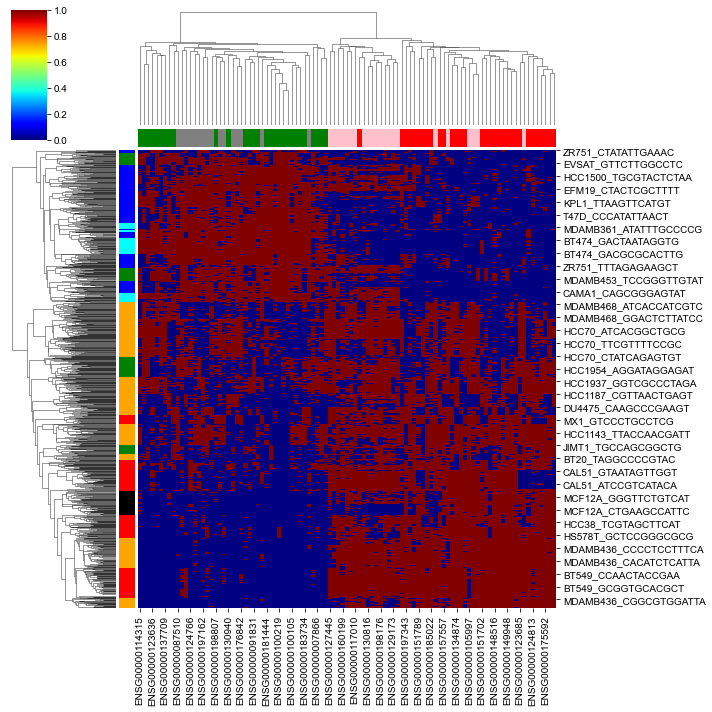

In [34]:
clustergrid=sns.clustermap(plot_df[genes], cmap='jet',col_colors=lab,row_colors=lab_rows)

In [35]:
cell_order = clustergrid.dendrogram_row.reordered_ind

In [36]:
epi_score = []
lum_score = []
mes_score = []
bas_score = []

for i in cell_order:
    epi_sum = 0
    lum_sum = 0
    mes_sum = 0
    bas_sum = 0
    for gene in plot_df.iloc[i].index:
        if gene in epi_genes:
            epi_sum += plot_df.iloc[i][gene]
        if gene in core_lum:
            lum_sum += plot_df.iloc[i][gene]
        if gene in mes_genes:
            mes_sum += plot_df.iloc[i][gene]
        if gene in core_basal:
            bas_sum += plot_df.iloc[i][gene]
    epi_score.append(epi_sum/len(epi_genes))
    lum_score.append(lum_sum/len(core_lum))
    mes_score.append(mes_sum/len(mes_genes))
    bas_score.append(bas_sum/len(core_basal))

Text(0, 0.5, 'epi_score')

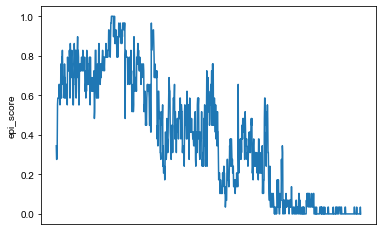

In [37]:
plt.plot(plot_df.iloc[cell_order].index, epi_score)
plt.tick_params(axis='x',bottom=False,labelbottom=False)
# plt.xlabel('mes-epi')
plt.ylabel('epi_score')

Text(0, 0.5, 'mes_score')

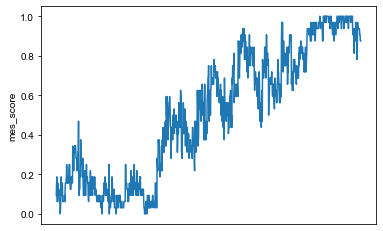

In [38]:
plt.plot(plot_df.iloc[cell_order].index, mes_score)
plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.ylabel('mes_score')

Text(0, 0.5, 'lum_score')

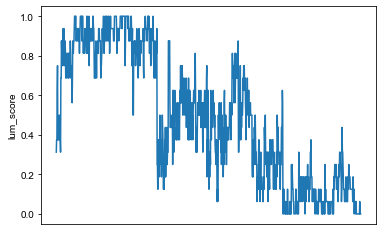

In [39]:
plt.plot(plot_df.iloc[cell_order].index, lum_score)
plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.ylabel('lum_score')

Text(0, 0.5, 'bas_score')

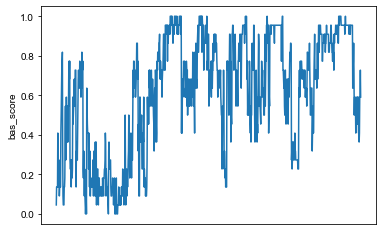

In [40]:
plt.plot(plot_df.iloc[cell_order].index, bas_score)
plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.ylabel('bas_score')

In [41]:
mes_epi = np.array(mes_score)-np.array(epi_score)
changed_cell_order = np.argsort(mes_epi)

changed_bas_score_order = []
changed_lum_score_order = []
for i in changed_cell_order:
    changed_bas_score_order.append(bas_score[i])
    changed_lum_score_order.append(lum_score[i])

Text(0, 0.5, 'bas_score')

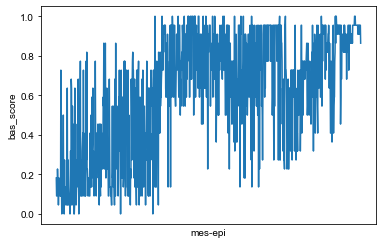

In [42]:
plt.plot(plot_df.iloc[changed_cell_order].index, changed_bas_score_order)
plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.xlabel('mes-epi')
plt.ylabel('bas_score')

Text(0, 0.5, 'lum_score')

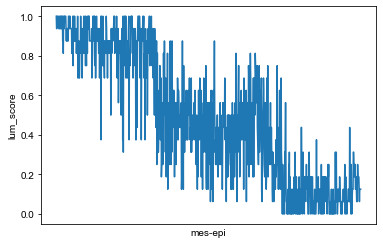

In [43]:
plt.plot(plot_df.iloc[changed_cell_order].index, changed_lum_score_order)
plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.xlabel('mes-epi')
plt.ylabel('lum_score')

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(336.9714285714286, 0.5, 'bas-lum')

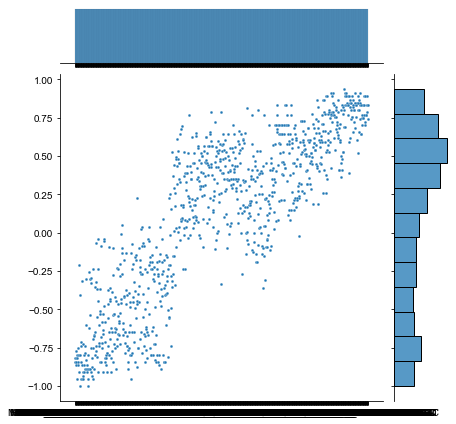

In [44]:
sns.jointplot(plot_df.iloc[changed_cell_order].index, np.array(changed_bas_score_order)-np.array(changed_lum_score_order),s=8)
plt.xlabel('mes-epi')
plt.ylabel('bas-lum')

In [45]:
bas_lum = np.array(bas_score)-np.array(lum_score)
changed_cell_order2 = np.argsort(bas_lum)

changed_epi_score_order = []
changed_mes_score_order = []
for i in changed_cell_order2:
    changed_epi_score_order.append(epi_score[i])
    changed_mes_score_order.append(mes_score[i])

Text(0, 0.5, 'epi_score')

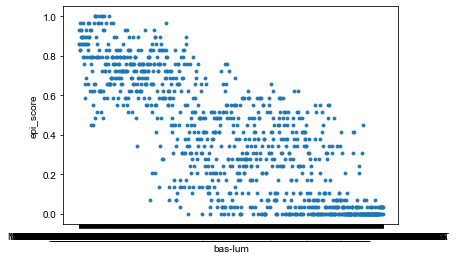

In [46]:
plt.scatter(plot_df.iloc[changed_cell_order2].index, changed_epi_score_order,s=8)
plt.xlabel('bas-lum')
plt.ylabel('epi_score')

In [47]:
plot_df.iloc[changed_cell_order2].index

Index(['MDAMB436_AAAAAACCGGGT', 'MCF12A_TCTATCCCTTGT', 'HCC1187_CGAATCCACCAA',
       'EFM19_CTGACCTGGATC', 'MCF12A_TACAAGAGGGGC', 'MDAMB453_CAAGAGTTGTGA',
       'HCC38_AGGGCATCAACG', 'CAL851_TAGTGTACAGCA', 'HCC1187_CATGTCAGCGCT',
       'MDAMB361_AGAATTGATTGT',
       ...
       'KPL1_GGGCGAAGATGC', 'MDAMB436_CGTTTGAACTAT', 'BT474_GCCTGCGTAGCC',
       'ZR751_TTTGGCCCTCGA', 'BT474_CTTCGAGATTGT', 'HDQP1_GCGGGCAAAATT',
       'ZR751_TACAGCAATCAC', 'HCC1143_AATCTCAATTGG', 'HCC70_TTCTTTGCATCG',
       'BT549_CGATGACGCCCG'],
      dtype='object', length=1000)

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 's'
  **contour_kws,


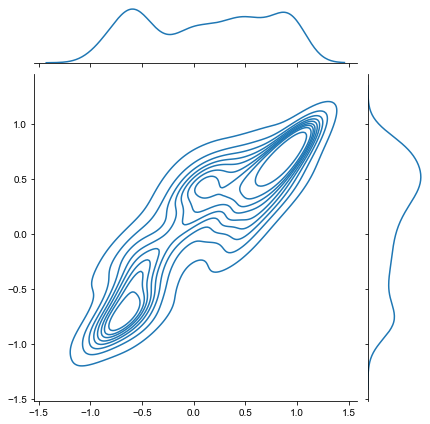

In [48]:
sns.jointplot(mes_epi, bas_lum,s=8,kind='kde')

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

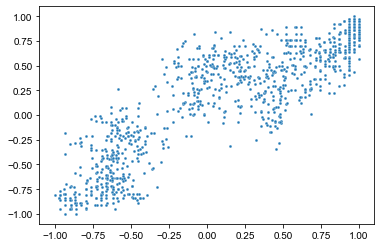

In [49]:
# sns.scatterplot(mes_epi, bas_lum, s=8)
p1 = mes_epi
p2 = bas_lum
p1_scaled = (p1 - (max(p1)+min(p1))/2)/((max(p1)-min(p1))/2)
p2_scaled = (p2 - (max(p2)+min(p2))/2)/((max(p2)-min(p2))/2)
sns.scatterplot(p1_scaled, p2_scaled, s=8)

In [50]:
p1 = mes_epi
p2 = bas_lum

p1_scaled = (p1 - (max(p1)+min(p1))/2)/((max(p1)-min(p1))/2)
p2_scaled = (p2 - (max(p2)+min(p2))/2)/((max(p2)-min(p2))/2)

In [57]:
with open('p1_scaled.txt', 'w') as f:
    for items in p1_scaled:
        f.write('%s\n'%items)
        
with open('p2_scaled.txt', 'w') as f:
    for items in p2_scaled:
        f.write('%s\n'%items)

In [ ]:
(df["Mesenchymal_cell_line_signature"]-df["Epithelial_cell_line_signature"] > 0).sum()

In [ ]:
len(df["Mesenchymal_cell_line_signature"]-df["Epithelial_cell_line_signature"])

In [ ]:
sns.kdeplot(df["Mesenchymal_cell_line_signature"]-df["Epithelial_cell_line_signature"])

In [ ]:
12988/35276

In [ ]:
(df["basal_breast_cancer"]-df["luminal_breast_cancer"] > 0.2).sum()

In [ ]:
len(df["basal_breast_cancer"]-df["luminal_breast_cancer"])

In [ ]:
sns.kdeplot(df["basal_breast_cancer"]-df["luminal_breast_cancer"])

In [ ]:
17431/35276